In [1]:
import os
import numpy as np
import collections
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
os.getcwd()

'/Users/luizaadelinaciucu/Work/ATLAS/TrackML'

In [3]:
def p(name,nparray):
    print(nparray)
    print(name,nparray.shape,type(nparray))
# done function

In [4]:
outputFolder="/Users/luizaadelinaciucu/Work/ATLAS/TrackMLtest/output"

In [5]:
nparray_InputTrain=np.load(outputFolder+"/NN_2_data_InputTrain_000000099.npy")
nparray_InputTest=np.load(outputFolder+"/NN_2_data_InputTest_000000099.npy")
nparray_OutputTrain=np.load(outputFolder+"/NN_2_data_OutputTrain_000000099.npy")
nparray_OutputTest=np.load(outputFolder+"/NN_2_data_OutputTest_000000099.npy")

In [6]:
p("InputTrain",nparray_InputTrain)

[[[   70.7608 ]
  [    7.70057]
  [-1502.5    ]
  ...
  [   34.332  ]
  [    1.88716]
  [ -697.5    ]]

 [[   46.6472 ]
  [    2.94397]
  [-1102.5    ]
  ...
  [   45.6353 ]
  [    3.55546]
  [-1097.5    ]]

 [[   36.3365 ]
  [    4.18884]
  [-1502.5    ]
  ...
  [   33.1648 ]
  [    4.34046]
  [-1302.5    ]]

 ...

 [[ -879.336  ]
  [  195.535  ]
  [ 1225.5    ]
  ...
  [ -111.476  ]
  [   28.5214 ]
  [  169.403  ]]

 [[ -928.183  ]
  [   83.586  ]
  [ 1222.5    ]
  ...
  [ -960.459  ]
  [   67.4609 ]
  [ 1222.5    ]]

 [[ -960.459  ]
  [   67.4609 ]
  [ 1222.5    ]
  ...
  [ -115.813  ]
  [   10.4317 ]
  [  143.195  ]]]
InputTrain (14561, 60, 1) <class 'numpy.ndarray'>


In [7]:
p("InputTest",nparray_InputTest)

[[[   79.9859 ]
  [   11.3613 ]
  [-1498.     ]
  ...
  [   42.7101 ]
  [    5.90873]
  [ -818.     ]]

 [[   63.7141 ]
  [    4.03639]
  [-1502.5    ]
  ...
  [   45.8633 ]
  [    3.58444]
  [-1102.5    ]]

 [[   96.2093 ]
  [   13.9164 ]
  [-1502.5    ]
  ...
  [   58.3467 ]
  [    8.42881]
  [ -962.5    ]]

 ...

 [[ -956.498  ]
  [  235.053  ]
  [ 1225.5    ]
  ...
  [ -110.736  ]
  [   33.0466 ]
  [  147.366  ]]

 [[-1002.     ]
  [   69.7137 ]
  [ 1222.5    ]
  ...
  [ -358.412  ]
  [   32.3191 ]
  [  431.593  ]]

 [[ -894.392  ]
  [  123.784  ]
  [ 1222.5    ]
  ...
  [ -659.084  ]
  [   59.3951 ]
  [  865.4    ]]]
InputTest (14561, 60, 1) <class 'numpy.ndarray'>


In [8]:
p ("OutputTrain", nparray_OutputTrain)


[[ 1.  1.  1. ... -1. -1. -1.]
 [ 1. -1.  1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ...  1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
OutputTrain (14561, 20) <class 'numpy.ndarray'>


In [9]:
p ("OutputTest",nparray_OutputTest)

[[-1. -1. -1. ...  1. -1.  1.]
 [-1.  1. -1. ... -1. -1. -1.]
 [-1.  1.  1. ...  1.  1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
OutputTest (14561, 20) <class 'numpy.ndarray'>


Acum vom pregati un NN

Create the model

In [10]:
np.random.seed(98383822)
import keras
nrNodesInputLayer=nparray_InputTrain.shape[1] # three inputs (x, y, z) for each hit in the batch
nrNodesOutputLayer=nparray_OutputTrain.shape[1] # one output for each hit in the batch


Using TensorFlow backend.


In [11]:
def get_model_01():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 




In [12]:
def get_model_02():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [13]:
def get_model_03():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.squared_hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [14]:
def get_model_04():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.squared_hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [15]:
def get_model_05():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [16]:
def get_model_06():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [17]:
def get_model_07():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.squared_hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [18]:
def get_model_08():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.squared_hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [19]:
model_01=get_model_01()
model_02=get_model_02()
model_03=get_model_03()
model_04=get_model_04()
model_05=get_model_05()
model_06=get_model_06()
model_07=get_model_07()
model_08=get_model_08()

In [20]:
numberOfEpochs=230
batchSize=500

In [21]:
def train_model(model):
    history=model.fit(
            nparray_InputTrain,
            nparray_OutputTrain,
            batchSize,numberOfEpochs,
            validation_data=(nparray_InputTest,nparray_OutputTest),
            shuffle=False
            )
    nparray_accuracy_Train=history.history["accuracy"]
    nparray_accuracy_Test=history.history["val_accuracy"]
    nparray_loss_Train=history.history["loss"]
    nparray_loss_Test=history.history["val_loss"]

    # ready to return
    return (model,nparray_accuracy_Train,nparray_accuracy_Test,nparray_loss_Train,nparray_loss_Test)
# done function

In [22]:
model_01,nparray_accuracy_Train_01,nparray_accuracy_Test_01,nparray_loss_Train_01,nparray_loss_Test_01=train_model(model_01)
model_02,nparray_accuracy_Train_02,nparray_accuracy_Test_02,nparray_loss_Train_02,nparray_loss_Test_02=train_model(model_02)
model_03,nparray_accuracy_Train_03,nparray_accuracy_Test_03,nparray_loss_Train_03,nparray_loss_Test_03=train_model(model_03)
model_04,nparray_accuracy_Train_04,nparray_accuracy_Test_04,nparray_loss_Train_04,nparray_loss_Test_04=train_model(model_04)
model_05,nparray_accuracy_Train_05,nparray_accuracy_Test_05,nparray_loss_Train_05,nparray_loss_Test_05=train_model(model_05)
model_06,nparray_accuracy_Train_06,nparray_accuracy_Test_06,nparray_loss_Train_06,nparray_loss_Test_06=train_model(model_06)
model_07,nparray_accuracy_Train_07,nparray_accuracy_Test_07,nparray_loss_Train_07,nparray_loss_Test_07=train_model(model_07)
model_08,nparray_accuracy_Train_08,nparray_accuracy_Test_08,nparray_loss_Train_08,nparray_loss_Test_08=train_model(model_08)


Train on 14561 samples, validate on 14561 samples
Epoch 1/230
14561/14561 [==============================] - 1s 78us/step - loss: 0.9553 - accuracy: 0.1302 - val_loss: 0.8983 - val_accuracy: 0.2621
Epoch 2/230
14561/14561 [==============================] - 1s 59us/step - loss: 0.8927 - accuracy: 0.1204 - val_loss: 0.8695 - val_accuracy: 0.1637
Epoch 3/230
14561/14561 [==============================] - 1s 60us/step - loss: 0.8423 - accuracy: 0.2801 - val_loss: 0.8201 - val_accuracy: 0.2672
Epoch 4/230
14561/14561 [==============================] - 1s 59us/step - loss: 0.7967 - accuracy: 0.2322 - val_loss: 0.7749 - val_accuracy: 0.3073
Epoch 5/230
14561/14561 [==============================] - 1s 60us/step - loss: 0.7800 - accuracy: 0.2347 - val_loss: 0.7891 - val_accuracy: 0.2470
Epoch 6/230
14561/14561 [==============================] - 1s 58us/step - loss: 0.7784 - accuracy: 0.2535 - val_loss: 0.7734 - val_accuracy: 0.2726
Epoch 7/230
14561/14561 [==============================] - 1s 

Epoch 56/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7199 - accuracy: 0.1666 - val_loss: 0.7261 - val_accuracy: 0.2405
Epoch 57/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7236 - accuracy: 0.2403 - val_loss: 0.7235 - val_accuracy: 0.1722
Epoch 58/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7270 - accuracy: 0.1844 - val_loss: 0.7200 - val_accuracy: 0.2324
Epoch 59/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7161 - accuracy: 0.2132 - val_loss: 0.7258 - val_accuracy: 0.1556
Epoch 60/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7216 - accuracy: 0.1588 - val_loss: 0.7193 - val_accuracy: 0.1500
Epoch 61/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7197 - accuracy: 0.1591 - val_loss: 0.7298 - val_accuracy: 0.1642
Epoch 62/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7197 - accuracy: 0.1674

Epoch 111/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7085 - accuracy: 0.3083 - val_loss: 0.7104 - val_accuracy: 0.3057
Epoch 112/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7150 - accuracy: 0.2882 - val_loss: 0.7140 - val_accuracy: 0.2179
Epoch 113/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7117 - accuracy: 0.2101 - val_loss: 0.7090 - val_accuracy: 0.2468
Epoch 114/230
14561/14561 [==============================] - 1s 49us/step - loss: 0.7069 - accuracy: 0.2522 - val_loss: 0.7063 - val_accuracy: 0.2685
Epoch 115/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7043 - accuracy: 0.2408 - val_loss: 0.7104 - val_accuracy: 0.1854
Epoch 116/230
14561/14561 [==============================] - 1s 49us/step - loss: 0.7062 - accuracy: 0.1922 - val_loss: 0.7094 - val_accuracy: 0.2359
Epoch 117/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7035 - accuracy:

14561/14561 [==============================] - 1s 50us/step - loss: 0.7069 - accuracy: 0.1871 - val_loss: 0.7125 - val_accuracy: 0.2042
Epoch 166/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7082 - accuracy: 0.2354 - val_loss: 0.7127 - val_accuracy: 0.2326
Epoch 167/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7079 - accuracy: 0.2537 - val_loss: 0.7076 - val_accuracy: 0.2852
Epoch 168/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.6998 - accuracy: 0.2872 - val_loss: 0.7019 - val_accuracy: 0.2944
Epoch 169/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.6998 - accuracy: 0.3003 - val_loss: 0.7030 - val_accuracy: 0.2910
Epoch 170/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7003 - accuracy: 0.2652 - val_loss: 0.7062 - val_accuracy: 0.2459
Epoch 171/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7008 - accuracy: 0.2498 - val_

Epoch 220/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.6852 - accuracy: 0.2781 - val_loss: 0.6961 - val_accuracy: 0.2735
Epoch 221/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.6951 - accuracy: 0.2713 - val_loss: 0.6942 - val_accuracy: 0.3040
Epoch 222/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.6858 - accuracy: 0.2987 - val_loss: 0.6897 - val_accuracy: 0.3006
Epoch 223/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.6855 - accuracy: 0.3112 - val_loss: 0.6938 - val_accuracy: 0.3131
Epoch 224/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.6883 - accuracy: 0.2925 - val_loss: 0.6900 - val_accuracy: 0.2928
Epoch 225/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.6877 - accuracy: 0.2930 - val_loss: 0.6933 - val_accuracy: 0.3122
Epoch 226/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.6867 - accuracy:

14561/14561 [==============================] - 1s 50us/step - loss: 0.7232 - accuracy: 0.3505 - val_loss: 0.7398 - val_accuracy: 0.3923
Epoch 45/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7282 - accuracy: 0.3672 - val_loss: 0.7319 - val_accuracy: 0.3769
Epoch 46/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7247 - accuracy: 0.3187 - val_loss: 0.7295 - val_accuracy: 0.3176
Epoch 47/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7251 - accuracy: 0.2724 - val_loss: 0.7227 - val_accuracy: 0.2711
Epoch 48/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7177 - accuracy: 0.2316 - val_loss: 0.7312 - val_accuracy: 0.1569
Epoch 49/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7239 - accuracy: 0.2116 - val_loss: 0.7238 - val_accuracy: 0.2279
Epoch 50/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7218 - accuracy: 0.1998 - val_loss: 

14561/14561 [==============================] - 1s 51us/step - loss: 0.7077 - accuracy: 0.2443 - val_loss: 0.7130 - val_accuracy: 0.2560
Epoch 100/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7051 - accuracy: 0.2357 - val_loss: 0.7162 - val_accuracy: 0.1739
Epoch 101/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7064 - accuracy: 0.2347 - val_loss: 0.7112 - val_accuracy: 0.2631
Epoch 102/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7084 - accuracy: 0.2573 - val_loss: 0.7160 - val_accuracy: 0.2195
Epoch 103/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7073 - accuracy: 0.2308 - val_loss: 0.7095 - val_accuracy: 0.2476
Epoch 104/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7060 - accuracy: 0.2340 - val_loss: 0.7095 - val_accuracy: 0.2478
Epoch 105/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7048 - accuracy: 0.2470 - val_

Epoch 154/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.6945 - accuracy: 0.2423 - val_loss: 0.7005 - val_accuracy: 0.2178
Epoch 155/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.6907 - accuracy: 0.2385 - val_loss: 0.6951 - val_accuracy: 0.2668
Epoch 156/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.6853 - accuracy: 0.2737 - val_loss: 0.6936 - val_accuracy: 0.3294
Epoch 157/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.6913 - accuracy: 0.3075 - val_loss: 0.6998 - val_accuracy: 0.3456
Epoch 158/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.6946 - accuracy: 0.3329 - val_loss: 0.6978 - val_accuracy: 0.2918
Epoch 159/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.6930 - accuracy: 0.2380 - val_loss: 0.6969 - val_accuracy: 0.2474
Epoch 160/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.6945 - accuracy:

14561/14561 [==============================] - 1s 50us/step - loss: 0.6890 - accuracy: 0.2447 - val_loss: 0.6961 - val_accuracy: 0.2362
Epoch 209/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.6896 - accuracy: 0.2800 - val_loss: 0.6920 - val_accuracy: 0.2527
Epoch 210/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.6862 - accuracy: 0.2635 - val_loss: 0.6908 - val_accuracy: 0.2668
Epoch 211/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.6847 - accuracy: 0.2559 - val_loss: 0.6963 - val_accuracy: 0.2628
Epoch 212/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.6894 - accuracy: 0.2674 - val_loss: 0.6964 - val_accuracy: 0.2474
Epoch 213/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.6917 - accuracy: 0.2531 - val_loss: 0.7005 - val_accuracy: 0.1871
Epoch 214/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.6963 - accuracy: 0.1790 - val_

14561/14561 [==============================] - 1s 52us/step - loss: 1.4594 - accuracy: 0.1776 - val_loss: 1.4637 - val_accuracy: 0.1773
Epoch 33/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.4598 - accuracy: 0.2009 - val_loss: 1.4690 - val_accuracy: 0.2251
Epoch 34/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.4726 - accuracy: 0.1599 - val_loss: 1.4668 - val_accuracy: 0.1436
Epoch 35/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.4677 - accuracy: 0.1967 - val_loss: 1.4693 - val_accuracy: 0.2277
Epoch 36/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.4547 - accuracy: 0.1841 - val_loss: 1.4644 - val_accuracy: 0.2081
Epoch 37/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.4596 - accuracy: 0.1409 - val_loss: 1.4671 - val_accuracy: 0.1122
Epoch 38/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.4689 - accuracy: 0.0998 - val_loss: 

14561/14561 [==============================] - 1s 51us/step - loss: 1.4148 - accuracy: 0.1191 - val_loss: 1.4176 - val_accuracy: 0.1195
Epoch 88/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.4098 - accuracy: 0.1191 - val_loss: 1.4055 - val_accuracy: 0.1605
Epoch 89/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.4063 - accuracy: 0.1526 - val_loss: 1.4142 - val_accuracy: 0.2064
Epoch 90/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.4095 - accuracy: 0.1948 - val_loss: 1.4104 - val_accuracy: 0.1870
Epoch 91/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.4130 - accuracy: 0.1911 - val_loss: 1.4090 - val_accuracy: 0.1944
Epoch 92/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.4054 - accuracy: 0.2083 - val_loss: 1.4148 - val_accuracy: 0.2213
Epoch 93/230
14561/14561 [==============================] - 1s 51us/step - loss: 1.4171 - accuracy: 0.2069 - val_loss: 

Epoch 142/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.3758 - accuracy: 0.2628 - val_loss: 1.3722 - val_accuracy: 0.2811
Epoch 143/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.3773 - accuracy: 0.2369 - val_loss: 1.3880 - val_accuracy: 0.2229
Epoch 144/230
14561/14561 [==============================] - 1s 51us/step - loss: 1.3746 - accuracy: 0.2221 - val_loss: 1.3738 - val_accuracy: 0.2291
Epoch 145/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.3748 - accuracy: 0.2165 - val_loss: 1.3795 - val_accuracy: 0.2201
Epoch 146/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.3805 - accuracy: 0.2077 - val_loss: 1.3818 - val_accuracy: 0.2009
Epoch 147/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.3770 - accuracy: 0.1854 - val_loss: 1.3732 - val_accuracy: 0.1952
Epoch 148/230
14561/14561 [==============================] - 1s 51us/step - loss: 1.3761 - accuracy:

14561/14561 [==============================] - 1s 52us/step - loss: 1.3759 - accuracy: 0.2152 - val_loss: 1.3789 - val_accuracy: 0.2284
Epoch 197/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.3732 - accuracy: 0.2288 - val_loss: 1.3739 - val_accuracy: 0.2304
Epoch 198/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.3724 - accuracy: 0.2343 - val_loss: 1.3835 - val_accuracy: 0.2457
Epoch 199/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.3789 - accuracy: 0.2201 - val_loss: 1.3804 - val_accuracy: 0.2098
Epoch 200/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.3745 - accuracy: 0.2167 - val_loss: 1.3747 - val_accuracy: 0.2466
Epoch 201/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.3618 - accuracy: 0.2568 - val_loss: 1.3734 - val_accuracy: 0.2698
Epoch 202/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.3707 - accuracy: 0.2654 - val_

14561/14561 [==============================] - 1s 53us/step - loss: 1.4455 - accuracy: 0.1513 - val_loss: 1.4619 - val_accuracy: 0.1209
Epoch 21/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.4504 - accuracy: 0.1526 - val_loss: 1.4580 - val_accuracy: 0.1613
Epoch 22/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.4664 - accuracy: 0.1317 - val_loss: 1.4533 - val_accuracy: 0.1392
Epoch 23/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.4543 - accuracy: 0.1672 - val_loss: 1.4573 - val_accuracy: 0.1710
Epoch 24/230
14561/14561 [==============================] - 1s 55us/step - loss: 1.4458 - accuracy: 0.1636 - val_loss: 1.4587 - val_accuracy: 0.1497
Epoch 25/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.4538 - accuracy: 0.1571 - val_loss: 1.4570 - val_accuracy: 0.1416
Epoch 26/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.4422 - accuracy: 0.1485 - val_loss: 

14561/14561 [==============================] - 1s 54us/step - loss: 1.3570 - accuracy: 0.1476 - val_loss: 1.3696 - val_accuracy: 0.1478
Epoch 76/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.3617 - accuracy: 0.1567 - val_loss: 1.3795 - val_accuracy: 0.1685
Epoch 77/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.3598 - accuracy: 0.1662 - val_loss: 1.3729 - val_accuracy: 0.1539
Epoch 78/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.3543 - accuracy: 0.1540 - val_loss: 1.3692 - val_accuracy: 0.1523
Epoch 79/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.3571 - accuracy: 0.1477 - val_loss: 1.3756 - val_accuracy: 0.1534
Epoch 80/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.3518 - accuracy: 0.1593 - val_loss: 1.3675 - val_accuracy: 0.1683
Epoch 81/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.3505 - accuracy: 0.1499 - val_loss: 

Epoch 130/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.3252 - accuracy: 0.1512 - val_loss: 1.3443 - val_accuracy: 0.1597
Epoch 131/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.3251 - accuracy: 0.1455 - val_loss: 1.3457 - val_accuracy: 0.1466
Epoch 132/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.3272 - accuracy: 0.1599 - val_loss: 1.3441 - val_accuracy: 0.1667
Epoch 133/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.3352 - accuracy: 0.1643 - val_loss: 1.3463 - val_accuracy: 0.1636
Epoch 134/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.3303 - accuracy: 0.1524 - val_loss: 1.3532 - val_accuracy: 0.1444
Epoch 135/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.3345 - accuracy: 0.1586 - val_loss: 1.3463 - val_accuracy: 0.1492
Epoch 136/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.3255 - accuracy:

14561/14561 [==============================] - 1s 55us/step - loss: 1.3155 - accuracy: 0.1584 - val_loss: 1.3349 - val_accuracy: 0.1662
Epoch 185/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.3159 - accuracy: 0.1558 - val_loss: 1.3546 - val_accuracy: 0.1559
Epoch 186/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.3211 - accuracy: 0.1633 - val_loss: 1.3312 - val_accuracy: 0.1654
Epoch 187/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.3170 - accuracy: 0.1679 - val_loss: 1.3405 - val_accuracy: 0.1655
Epoch 188/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.3203 - accuracy: 0.1583 - val_loss: 1.3347 - val_accuracy: 0.1619
Epoch 189/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.3196 - accuracy: 0.1558 - val_loss: 1.3389 - val_accuracy: 0.1585
Epoch 190/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.3196 - accuracy: 0.1599 - val_

14561/14561 [==============================] - 1s 54us/step - loss: 0.7663 - accuracy: 0.1023 - val_loss: 0.7690 - val_accuracy: 0.1011
Epoch 9/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.7680 - accuracy: 0.1023 - val_loss: 0.7686 - val_accuracy: 0.1007
Epoch 10/230
14561/14561 [==============================] - 1s 55us/step - loss: 0.7661 - accuracy: 0.1025 - val_loss: 0.7649 - val_accuracy: 0.1004
Epoch 11/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.7654 - accuracy: 0.1011 - val_loss: 0.7639 - val_accuracy: 0.1006
Epoch 12/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.7629 - accuracy: 0.1011 - val_loss: 0.7630 - val_accuracy: 0.1003
Epoch 13/230
14561/14561 [==============================] - 1s 53us/step - loss: 0.7615 - accuracy: 0.1010 - val_loss: 0.7630 - val_accuracy: 0.0987
Epoch 14/230
14561/14561 [==============================] - 1s 53us/step - loss: 0.7637 - accuracy: 0.0981 - val_loss: 0

14561/14561 [==============================] - 1s 53us/step - loss: 0.7251 - accuracy: 0.0992 - val_loss: 0.7197 - val_accuracy: 0.1023
Epoch 64/230
14561/14561 [==============================] - 1s 53us/step - loss: 0.7167 - accuracy: 0.0985 - val_loss: 0.7261 - val_accuracy: 0.1040
Epoch 65/230
14561/14561 [==============================] - 1s 53us/step - loss: 0.7248 - accuracy: 0.0990 - val_loss: 0.7250 - val_accuracy: 0.0957
Epoch 66/230
14561/14561 [==============================] - 1s 53us/step - loss: 0.7162 - accuracy: 0.0966 - val_loss: 0.7222 - val_accuracy: 0.1010
Epoch 67/230
14561/14561 [==============================] - 1s 53us/step - loss: 0.7159 - accuracy: 0.0996 - val_loss: 0.7228 - val_accuracy: 0.1053
Epoch 68/230
14561/14561 [==============================] - 1s 53us/step - loss: 0.7174 - accuracy: 0.1019 - val_loss: 0.7200 - val_accuracy: 0.1042
Epoch 69/230
14561/14561 [==============================] - 1s 53us/step - loss: 0.7163 - accuracy: 0.1001 - val_loss: 

Epoch 118/230
14561/14561 [==============================] - 1s 53us/step - loss: 0.7038 - accuracy: 0.1023 - val_loss: 0.7092 - val_accuracy: 0.1027
Epoch 119/230
14561/14561 [==============================] - 1s 55us/step - loss: 0.7020 - accuracy: 0.0988 - val_loss: 0.7095 - val_accuracy: 0.1048
Epoch 120/230
14561/14561 [==============================] - 1s 53us/step - loss: 0.7106 - accuracy: 0.1025 - val_loss: 0.7186 - val_accuracy: 0.0990
Epoch 121/230
14561/14561 [==============================] - 1s 53us/step - loss: 0.7082 - accuracy: 0.1047 - val_loss: 0.7086 - val_accuracy: 0.1056
Epoch 122/230
14561/14561 [==============================] - 1s 53us/step - loss: 0.7071 - accuracy: 0.1038 - val_loss: 0.7103 - val_accuracy: 0.1059
Epoch 123/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.7039 - accuracy: 0.1075 - val_loss: 0.7054 - val_accuracy: 0.1071
Epoch 124/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.7005 - accuracy:

14561/14561 [==============================] - 1s 54us/step - loss: 0.7007 - accuracy: 0.1075 - val_loss: 0.7031 - val_accuracy: 0.1109
Epoch 173/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.6998 - accuracy: 0.1108 - val_loss: 0.7008 - val_accuracy: 0.1068
Epoch 174/230
14561/14561 [==============================] - 1s 53us/step - loss: 0.6980 - accuracy: 0.1047 - val_loss: 0.7076 - val_accuracy: 0.1127
Epoch 175/230
14561/14561 [==============================] - 1s 53us/step - loss: 0.7079 - accuracy: 0.1033 - val_loss: 0.7094 - val_accuracy: 0.1028
Epoch 176/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.7126 - accuracy: 0.0996 - val_loss: 0.7108 - val_accuracy: 0.1058
Epoch 177/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.7094 - accuracy: 0.1045 - val_loss: 0.7076 - val_accuracy: 0.1111
Epoch 178/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.7031 - accuracy: 0.1080 - val_

Epoch 227/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.6997 - accuracy: 0.1111 - val_loss: 0.7036 - val_accuracy: 0.1098
Epoch 228/230
14561/14561 [==============================] - 1s 55us/step - loss: 0.7004 - accuracy: 0.1071 - val_loss: 0.7018 - val_accuracy: 0.1126
Epoch 229/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.6999 - accuracy: 0.1080 - val_loss: 0.6998 - val_accuracy: 0.1161
Epoch 230/230
14561/14561 [==============================] - 1s 53us/step - loss: 0.6962 - accuracy: 0.1130 - val_loss: 0.7019 - val_accuracy: 0.1195
Train on 14561 samples, validate on 14561 samples
Epoch 1/230
14561/14561 [==============================] - 1s 77us/step - loss: 0.8521 - accuracy: 0.1662 - val_loss: 0.8297 - val_accuracy: 0.2768
Epoch 2/230
14561/14561 [==============================] - 1s 55us/step - loss: 0.8178 - accuracy: 0.1949 - val_loss: 0.8096 - val_accuracy: 0.2790
Epoch 3/230
14561/14561 [=============================

Epoch 52/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.6937 - accuracy: 0.1419 - val_loss: 0.6967 - val_accuracy: 0.1353
Epoch 53/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.6919 - accuracy: 0.1718 - val_loss: 0.6951 - val_accuracy: 0.1468
Epoch 54/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.6934 - accuracy: 0.1709 - val_loss: 0.6910 - val_accuracy: 0.1592
Epoch 55/230
14561/14561 [==============================] - 1s 55us/step - loss: 0.6858 - accuracy: 0.1499 - val_loss: 0.6921 - val_accuracy: 0.1501
Epoch 56/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.6868 - accuracy: 0.1659 - val_loss: 0.6944 - val_accuracy: 0.1637
Epoch 57/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.6851 - accuracy: 0.1466 - val_loss: 0.6969 - val_accuracy: 0.1467
Epoch 58/230
14561/14561 [==============================] - 1s 55us/step - loss: 0.6915 - accuracy: 0.1618

Epoch 107/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.6909 - accuracy: 0.2049 - val_loss: 0.6938 - val_accuracy: 0.1933
Epoch 108/230
14561/14561 [==============================] - 1s 55us/step - loss: 0.6851 - accuracy: 0.1922 - val_loss: 0.6868 - val_accuracy: 0.1816
Epoch 109/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.6808 - accuracy: 0.1854 - val_loss: 0.6854 - val_accuracy: 0.1902
Epoch 110/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.6856 - accuracy: 0.1995 - val_loss: 0.6954 - val_accuracy: 0.2181
Epoch 111/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.6888 - accuracy: 0.1797 - val_loss: 0.6892 - val_accuracy: 0.1819
Epoch 112/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.6870 - accuracy: 0.1724 - val_loss: 0.6820 - val_accuracy: 0.1723
Epoch 113/230
14561/14561 [==============================] - 1s 55us/step - loss: 0.6831 - accuracy:

14561/14561 [==============================] - 1s 55us/step - loss: 0.6749 - accuracy: 0.2025 - val_loss: 0.6862 - val_accuracy: 0.2163
Epoch 162/230
14561/14561 [==============================] - 1s 56us/step - loss: 0.6783 - accuracy: 0.2180 - val_loss: 0.6843 - val_accuracy: 0.2130
Epoch 163/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.6801 - accuracy: 0.2145 - val_loss: 0.6892 - val_accuracy: 0.2166
Epoch 164/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.6849 - accuracy: 0.2187 - val_loss: 0.6882 - val_accuracy: 0.2062
Epoch 165/230
14561/14561 [==============================] - 1s 55us/step - loss: 0.6815 - accuracy: 0.1978 - val_loss: 0.6928 - val_accuracy: 0.2018
Epoch 166/230
14561/14561 [==============================] - 1s 55us/step - loss: 0.6833 - accuracy: 0.1865 - val_loss: 0.6851 - val_accuracy: 0.1898
Epoch 167/230
14561/14561 [==============================] - 1s 55us/step - loss: 0.6831 - accuracy: 0.1751 - val_

Epoch 216/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.6864 - accuracy: 0.2051 - val_loss: 0.6893 - val_accuracy: 0.1955
Epoch 217/230
14561/14561 [==============================] - 1s 55us/step - loss: 0.6822 - accuracy: 0.1857 - val_loss: 0.6840 - val_accuracy: 0.1898
Epoch 218/230
14561/14561 [==============================] - 1s 55us/step - loss: 0.6785 - accuracy: 0.1956 - val_loss: 0.6846 - val_accuracy: 0.1911
Epoch 219/230
14561/14561 [==============================] - 1s 55us/step - loss: 0.6814 - accuracy: 0.1955 - val_loss: 0.6901 - val_accuracy: 0.2005
Epoch 220/230
14561/14561 [==============================] - 1s 55us/step - loss: 0.6840 - accuracy: 0.1757 - val_loss: 0.6855 - val_accuracy: 0.1860
Epoch 221/230
14561/14561 [==============================] - 1s 55us/step - loss: 0.6764 - accuracy: 0.1819 - val_loss: 0.6821 - val_accuracy: 0.1880
Epoch 222/230
14561/14561 [==============================] - 1s 55us/step - loss: 0.6808 - accuracy:

14561/14561 [==============================] - 1s 54us/step - loss: 1.4659 - accuracy: 0.1101 - val_loss: 1.4730 - val_accuracy: 0.1217
Epoch 41/230
14561/14561 [==============================] - 1s 56us/step - loss: 1.4768 - accuracy: 0.1248 - val_loss: 1.4784 - val_accuracy: 0.1004
Epoch 42/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.4716 - accuracy: 0.0979 - val_loss: 1.4802 - val_accuracy: 0.0988
Epoch 43/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.4696 - accuracy: 0.0947 - val_loss: 1.4751 - val_accuracy: 0.1069
Epoch 44/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.4741 - accuracy: 0.0984 - val_loss: 1.4750 - val_accuracy: 0.0859
Epoch 45/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.4633 - accuracy: 0.0861 - val_loss: 1.4675 - val_accuracy: 0.1132
Epoch 46/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.4539 - accuracy: 0.1057 - val_loss: 

14561/14561 [==============================] - 1s 55us/step - loss: 1.4299 - accuracy: 0.1063 - val_loss: 1.4297 - val_accuracy: 0.1117
Epoch 96/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.4276 - accuracy: 0.1170 - val_loss: 1.4375 - val_accuracy: 0.1490
Epoch 97/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.4345 - accuracy: 0.1248 - val_loss: 1.4408 - val_accuracy: 0.1569
Epoch 98/230
14561/14561 [==============================] - 1s 55us/step - loss: 1.4356 - accuracy: 0.1262 - val_loss: 1.4415 - val_accuracy: 0.1464
Epoch 99/230
14561/14561 [==============================] - 1s 55us/step - loss: 1.4394 - accuracy: 0.1157 - val_loss: 1.4374 - val_accuracy: 0.1264
Epoch 100/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.4306 - accuracy: 0.1228 - val_loss: 1.4358 - val_accuracy: 0.1168
Epoch 101/230
14561/14561 [==============================] - 1s 55us/step - loss: 1.4311 - accuracy: 0.1044 - val_loss

Epoch 150/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.4104 - accuracy: 0.2320 - val_loss: 1.4267 - val_accuracy: 0.2739
Epoch 151/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.4152 - accuracy: 0.2930 - val_loss: 1.4337 - val_accuracy: 0.3009
Epoch 152/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.4291 - accuracy: 0.3103 - val_loss: 1.4372 - val_accuracy: 0.3190
Epoch 153/230
14561/14561 [==============================] - 1s 56us/step - loss: 1.4283 - accuracy: 0.2838 - val_loss: 1.4336 - val_accuracy: 0.3191
Epoch 154/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.4278 - accuracy: 0.2501 - val_loss: 1.4307 - val_accuracy: 0.2501
Epoch 155/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.4247 - accuracy: 0.2180 - val_loss: 1.4284 - val_accuracy: 0.2296
Epoch 156/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.4143 - accuracy:

14561/14561 [==============================] - 1s 55us/step - loss: 1.4180 - accuracy: 0.1811 - val_loss: 1.4183 - val_accuracy: 0.2291
Epoch 205/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.4109 - accuracy: 0.2361 - val_loss: 1.4172 - val_accuracy: 0.2388
Epoch 206/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.4068 - accuracy: 0.2424 - val_loss: 1.4194 - val_accuracy: 0.2403
Epoch 207/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.4136 - accuracy: 0.2272 - val_loss: 1.4260 - val_accuracy: 0.2483
Epoch 208/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.4158 - accuracy: 0.2330 - val_loss: 1.4285 - val_accuracy: 0.2275
Epoch 209/230
14561/14561 [==============================] - 1s 55us/step - loss: 1.4288 - accuracy: 0.2080 - val_loss: 1.4397 - val_accuracy: 0.1671
Epoch 210/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.4210 - accuracy: 0.1869 - val_

14561/14561 [==============================] - 1s 55us/step - loss: 1.6099 - accuracy: 0.0715 - val_loss: 1.6081 - val_accuracy: 0.1133
Epoch 29/230
14561/14561 [==============================] - 1s 57us/step - loss: 1.5996 - accuracy: 0.0572 - val_loss: 1.5967 - val_accuracy: 0.0839
Epoch 30/230
14561/14561 [==============================] - 1s 55us/step - loss: 1.5948 - accuracy: 0.0825 - val_loss: 1.6045 - val_accuracy: 0.1082
Epoch 31/230
14561/14561 [==============================] - 1s 56us/step - loss: 1.5932 - accuracy: 0.0690 - val_loss: 1.5929 - val_accuracy: 0.0918
Epoch 32/230
14561/14561 [==============================] - 1s 55us/step - loss: 1.5962 - accuracy: 0.0586 - val_loss: 1.5994 - val_accuracy: 0.0582
Epoch 33/230
14561/14561 [==============================] - 1s 56us/step - loss: 1.5893 - accuracy: 0.0568 - val_loss: 1.5972 - val_accuracy: 0.0553
Epoch 34/230
14561/14561 [==============================] - 1s 57us/step - loss: 1.5874 - accuracy: 0.0515 - val_loss: 

14561/14561 [==============================] - 1s 58us/step - loss: 1.5301 - accuracy: 0.1009 - val_loss: 1.5356 - val_accuracy: 0.1076
Epoch 84/230
14561/14561 [==============================] - 1s 58us/step - loss: 1.5297 - accuracy: 0.0944 - val_loss: 1.5289 - val_accuracy: 0.0917
Epoch 85/230
14561/14561 [==============================] - 1s 56us/step - loss: 1.5243 - accuracy: 0.0884 - val_loss: 1.5353 - val_accuracy: 0.1067
Epoch 86/230
14561/14561 [==============================] - 1s 55us/step - loss: 1.5310 - accuracy: 0.1038 - val_loss: 1.5450 - val_accuracy: 0.0992
Epoch 87/230
14561/14561 [==============================] - 1s 55us/step - loss: 1.5342 - accuracy: 0.0906 - val_loss: 1.5294 - val_accuracy: 0.1009
Epoch 88/230
14561/14561 [==============================] - 1s 55us/step - loss: 1.5232 - accuracy: 0.0934 - val_loss: 1.5306 - val_accuracy: 0.0953
Epoch 89/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.5245 - accuracy: 0.0924 - val_loss: 

Epoch 138/230
14561/14561 [==============================] - 1s 55us/step - loss: 1.5185 - accuracy: 0.0735 - val_loss: 1.5241 - val_accuracy: 0.0720
Epoch 139/230
14561/14561 [==============================] - 1s 56us/step - loss: 1.5250 - accuracy: 0.0599 - val_loss: 1.5200 - val_accuracy: 0.0765
Epoch 140/230
14561/14561 [==============================] - 1s 56us/step - loss: 1.5119 - accuracy: 0.0813 - val_loss: 1.5216 - val_accuracy: 0.0768
Epoch 141/230
14561/14561 [==============================] - 1s 56us/step - loss: 1.5250 - accuracy: 0.0738 - val_loss: 1.5277 - val_accuracy: 0.0720
Epoch 142/230
14561/14561 [==============================] - 1s 57us/step - loss: 1.5282 - accuracy: 0.0706 - val_loss: 1.5386 - val_accuracy: 0.0637
Epoch 143/230
14561/14561 [==============================] - 1s 57us/step - loss: 1.5158 - accuracy: 0.0671 - val_loss: 1.5290 - val_accuracy: 0.0696
Epoch 144/230
14561/14561 [==============================] - 1s 60us/step - loss: 1.5116 - accuracy:

14561/14561 [==============================] - 1s 55us/step - loss: 1.5270 - accuracy: 0.1113 - val_loss: 1.5229 - val_accuracy: 0.1084
Epoch 193/230
14561/14561 [==============================] - 1s 55us/step - loss: 1.5183 - accuracy: 0.1060 - val_loss: 1.5141 - val_accuracy: 0.0948
Epoch 194/230
14561/14561 [==============================] - 1s 57us/step - loss: 1.5119 - accuracy: 0.0878 - val_loss: 1.5131 - val_accuracy: 0.0869
Epoch 195/230
14561/14561 [==============================] - 1s 55us/step - loss: 1.5082 - accuracy: 0.0821 - val_loss: 1.5095 - val_accuracy: 0.0942
Epoch 196/230
14561/14561 [==============================] - 1s 55us/step - loss: 1.5082 - accuracy: 0.0935 - val_loss: 1.5085 - val_accuracy: 0.0963
Epoch 197/230
14561/14561 [==============================] - 1s 55us/step - loss: 1.5129 - accuracy: 0.0955 - val_loss: 1.5117 - val_accuracy: 0.0994
Epoch 198/230
14561/14561 [==============================] - 1s 55us/step - loss: 1.5046 - accuracy: 0.0970 - val_

In [23]:
from collections import Counter 
def predict_from_model(model,nparray_Input,nparray_Output):
    nparray_PredictedOutput=model.predict(nparray_Input)
    p("PredictedOutput",nparray_PredictedOutput)
    p("Output",nparray_Output)
    nparray_Diff=nparray_PredictedOutput-nparray_Output
    p("Diff",nparray_Diff)
    counter=0
    for line in nparray_Diff:
        #print("line",line)
        for el in line:
            #print("el",el)
            if el==0:
                counter+=1
    print("counter",counter)
    nrEl=nparray_Diff.shape[0]*nparray_Diff.shape[1]
    print("nrEl",nrEl)
    ratio1=counter/nrEl
    print("ratio1",ratio1)
    np.count_nonzero(nparray_Diff)
    ratio2=1-np.count_nonzero(nparray_Diff)/nrEl
    print("ratio2",ratio2)
    list_counterLine=[]
    for line in nparray_Diff:
        counterLine=0
        for el in line:
            if el==0:
                counterLine+=1
        # print("counterLine",counterLine)
        list_counterLine.append(counterLine) 
    #print("list_counterLine",list_counterLine,len(list_counterLine))
    counter=Counter(list_counterLine)
    print("counter",counter)
    for el in sorted(counter.keys()):
        print("el",el,"counter",counter[el])
    nparray_counterLine=np.array(list_counterLine)
    p("counterLine",nparray_counterLine)
    # done all ready to return
    return (ratio2,nparray_counterLine)
# done function

In [24]:
(ratio_01_Train,nparray_counterLine_01_Train)=predict_from_model(model_01,nparray_InputTrain,nparray_OutputTrain)
(ratio_02_Train,nparray_counterLine_02_Train)=predict_from_model(model_02,nparray_InputTrain,nparray_OutputTrain)
(ratio_03_Train,nparray_counterLine_03_Train)=predict_from_model(model_03,nparray_InputTrain,nparray_OutputTrain)
(ratio_04_Train,nparray_counterLine_04_Train)=predict_from_model(model_04,nparray_InputTrain,nparray_OutputTrain)
(ratio_05_Train,nparray_counterLine_05_Train)=predict_from_model(model_05,nparray_InputTrain,nparray_OutputTrain)
(ratio_06_Train,nparray_counterLine_06_Train)=predict_from_model(model_06,nparray_InputTrain,nparray_OutputTrain)
(ratio_07_Train,nparray_counterLine_07_Train)=predict_from_model(model_07,nparray_InputTrain,nparray_OutputTrain)
(ratio_08_Train,nparray_counterLine_08_Train)=predict_from_model(model_08,nparray_InputTrain,nparray_OutputTrain)

[[ 1.  1.  1. ... -1. -1. -1.]
 [-1.  1.  1. ... -1. -1. -1.]
 [-1.  1.  1. ... -1. -1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
PredictedOutput (14561, 20) <class 'numpy.ndarray'>
[[ 1.  1.  1. ... -1. -1. -1.]
 [ 1. -1.  1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ...  1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
Output (14561, 20) <class 'numpy.ndarray'>
[[ 0.  0.  0. ...  0.  0.  0.]
 [-2.  2.  0. ...  0.  0.  0.]
 [ 0.  2.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... -2.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
Diff (14561, 20) <class 'numpy.ndarray'>
counter 190925
nrEl 291220
ratio1 0.6556040107135499
ratio2 0.6556040107135499
counter Counter({15: 2135, 14: 1900, 16: 1780, 13: 1667, 12: 1314, 17: 1234, 11: 1048, 10: 812, 9: 633, 18: 471, 8: 440, 7: 352, 6: 236, 5: 214, 19: 123, 4: 98, 3: 71, 2: 21, 1: 6, 20: 6})
el 1 counter 6
el 2 

counter Counter({15: 2059, 14: 2032, 16: 1840, 13: 1723, 12: 1376, 17: 1096, 11: 1078, 10: 770, 9: 565, 18: 538, 8: 410, 7: 264, 6: 255, 19: 146, 5: 146, 4: 112, 3: 74, 2: 49, 20: 15, 1: 13})
el 1 counter 13
el 2 counter 49
el 3 counter 74
el 4 counter 112
el 5 counter 146
el 6 counter 255
el 7 counter 264
el 8 counter 410
el 9 counter 565
el 10 counter 770
el 11 counter 1078
el 12 counter 1376
el 13 counter 1723
el 14 counter 2032
el 15 counter 2059
el 16 counter 1840
el 17 counter 1096
el 18 counter 538
el 19 counter 146
el 20 counter 15
[19 15 16 ... 16 12 14]
counterLine (14561,) <class 'numpy.ndarray'>
[[ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [-1.  1. -1. ... -1. -1. -1.]
 [-1.  1.  1. ... -1. -1. -1.]]
PredictedOutput (14561, 20) <class 'numpy.ndarray'>
[[ 1.  1.  1. ... -1. -1. -1.]
 [ 1. -1.  1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1

In [25]:
(ratio_01_Test,nparray_counterLine_01_Test)=predict_from_model(model_01,nparray_InputTest,nparray_OutputTest)
(ratio_02_Test,nparray_counterLine_02_Test)=predict_from_model(model_02,nparray_InputTest,nparray_OutputTest)
(ratio_03_Test,nparray_counterLine_03_Test)=predict_from_model(model_03,nparray_InputTest,nparray_OutputTest)
(ratio_04_Test,nparray_counterLine_04_Test)=predict_from_model(model_04,nparray_InputTest,nparray_OutputTest)
(ratio_05_Test,nparray_counterLine_05_Test)=predict_from_model(model_05,nparray_InputTest,nparray_OutputTest)
(ratio_06_Test,nparray_counterLine_06_Test)=predict_from_model(model_06,nparray_InputTest,nparray_OutputTest)
(ratio_07_Test,nparray_counterLine_07_Test)=predict_from_model(model_07,nparray_InputTest,nparray_OutputTest)
(ratio_08_Test,nparray_counterLine_08_Test)=predict_from_model(model_08,nparray_InputTest,nparray_OutputTest)

[[ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [-1.  1.  1. ... -1. -1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
PredictedOutput (14561, 20) <class 'numpy.ndarray'>
[[-1. -1. -1. ...  1. -1.  1.]
 [-1.  1. -1. ... -1. -1. -1.]
 [-1.  1.  1. ...  1.  1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
Output (14561, 20) <class 'numpy.ndarray'>
[[ 2.  2.  2. ... -2.  0. -2.]
 [ 2.  0.  2. ...  0.  0.  0.]
 [ 0.  0.  0. ... -2. -2.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
Diff (14561, 20) <class 'numpy.ndarray'>
counter 190413
nrEl 291220
ratio1 0.6538458897053774
ratio2 0.6538458897053774
counter Counter({15: 2031, 14: 1899, 16: 1851, 13: 1653, 12: 1314, 17: 1192, 11: 1029, 10: 775, 9: 674, 18: 510, 8: 451, 7: 378, 6: 249, 5: 200, 4: 125, 19: 118, 3: 77, 2: 23, 20: 7, 1: 3, 0: 2})
el 0 counter 

[[ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [-1.  1. -1. ... -1. -1. -1.]]
PredictedOutput (14561, 20) <class 'numpy.ndarray'>
[[-1. -1. -1. ...  1. -1.  1.]
 [-1.  1. -1. ... -1. -1. -1.]
 [-1.  1.  1. ...  1.  1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
Output (14561, 20) <class 'numpy.ndarray'>
[[ 2.  2.  2. ... -2.  0. -2.]
 [ 2.  0.  2. ...  0.  0.  0.]
 [ 2.  0.  0. ... -2. -2.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [-2.  0. -2. ...  0.  0.  0.]]
Diff (14561, 20) <class 'numpy.ndarray'>
counter 186898
nrEl 291220
ratio1 0.6417759769246618
ratio2 0.6417759769246618
counter Counter({14: 2169, 15: 2165, 13: 1927, 12: 1685, 16: 1401, 11: 1302, 10: 906, 17: 722, 9: 680, 8: 457, 7: 324, 18: 292, 6: 186, 5: 147, 4: 89, 19: 52, 3: 38, 2: 10, 1: 5, 20: 4})
el 1 counter 5
el 2 co

In [26]:
print("ratio_01_Train",ratio_01_Train)
print("ratio_02_Train",ratio_02_Train)
print("ratio_03_Train",ratio_03_Train)
print("ratio_04_Train",ratio_04_Train)
print("ratio_05_Train",ratio_05_Train)
print("ratio_06_Train",ratio_06_Train)
print("ratio_07_Train",ratio_07_Train)
print("ratio_08_Train",ratio_08_Train)

ratio_01_Train 0.6556040107135499
ratio_02_Train 0.6546562736075818
ratio_03_Train 0.6533651534922051
ratio_04_Train 0.6610157269418309
ratio_05_Train 0.6503880228006318
ratio_06_Train 0.6589039214339674
ratio_07_Train 0.6448904608199986
ratio_08_Train 0.6233466108096971


In [27]:
print("ratio_01_Test",ratio_01_Test)
print("ratio_02_Test",ratio_02_Test)
print("ratio_03_Test",ratio_03_Test)
print("ratio_04_Test",ratio_04_Test)
print("ratio_05_Test",ratio_05_Test)
print("ratio_06_Test",ratio_06_Test)
print("ratio_07_Test",ratio_07_Test)
print("ratio_08_Test",ratio_08_Test)

ratio_01_Test 0.6538458897053774
ratio_02_Test 0.6514010026783874
ratio_03_Test 0.6515658265229036
ratio_04_Test 0.6561190852276629
ratio_05_Test 0.6484925485886959
ratio_06_Test 0.655844378820136
ratio_07_Test 0.6417759769246618
ratio_08_Test 0.6215472838403956


In [28]:
p("nparray_counterLine_01_Train",nparray_counterLine_01_Train)
p("nparray_counterLine_02_Train",nparray_counterLine_02_Train)
p("nparray_counterLine_03_Train",nparray_counterLine_03_Train)
p("nparray_counterLine_04_Train",nparray_counterLine_04_Train)
p("nparray_counterLine_05_Train",nparray_counterLine_05_Train)
p("nparray_counterLine_06_Train",nparray_counterLine_06_Train)
p("nparray_counterLine_07_Train",nparray_counterLine_07_Train)
p("nparray_counterLine_08_Train",nparray_counterLine_08_Train)

[19 14 15 ... 17 14 16]
nparray_counterLine_01_Train (14561,) <class 'numpy.ndarray'>
[18 14 16 ... 17 14 16]
nparray_counterLine_02_Train (14561,) <class 'numpy.ndarray'>
[19 15 16 ... 16 12 16]
nparray_counterLine_03_Train (14561,) <class 'numpy.ndarray'>
[19 15 16 ... 17 13 16]
nparray_counterLine_04_Train (14561,) <class 'numpy.ndarray'>
[18 14 16 ... 15 15 16]
nparray_counterLine_05_Train (14561,) <class 'numpy.ndarray'>
[19 15 16 ... 16 12 14]
nparray_counterLine_06_Train (14561,) <class 'numpy.ndarray'>
[17 15 14 ... 17 14 15]
nparray_counterLine_07_Train (14561,) <class 'numpy.ndarray'>
[14 10 11 ... 15 11 16]
nparray_counterLine_08_Train (14561,) <class 'numpy.ndarray'>


In [29]:
p("nparray_counterLine_01_Test",nparray_counterLine_01_Test)
p("nparray_counterLine_02_Test",nparray_counterLine_02_Test)
p("nparray_counterLine_03_Test",nparray_counterLine_03_Test)
p("nparray_counterLine_04_Test",nparray_counterLine_04_Test)
p("nparray_counterLine_05_Test",nparray_counterLine_05_Test)
p("nparray_counterLine_06_Test",nparray_counterLine_06_Test)
p("nparray_counterLine_07_Test",nparray_counterLine_07_Test)
p("nparray_counterLine_08_Test",nparray_counterLine_08_Test)

[ 3 15  9 ... 16 17 16]
nparray_counterLine_01_Test (14561,) <class 'numpy.ndarray'>
[ 2 14  9 ... 14 15 15]
nparray_counterLine_02_Test (14561,) <class 'numpy.ndarray'>
[ 3 17 10 ... 16 17 15]
nparray_counterLine_03_Test (14561,) <class 'numpy.ndarray'>
[ 3 17 10 ... 15 15 16]
nparray_counterLine_04_Test (14561,) <class 'numpy.ndarray'>
[ 4 16 10 ... 16 15 14]
nparray_counterLine_05_Test (14561,) <class 'numpy.ndarray'>
[ 3 17 10 ... 16 14 15]
nparray_counterLine_06_Test (14561,) <class 'numpy.ndarray'>
[ 4 14  8 ... 16 16 15]
nparray_counterLine_07_Test (14561,) <class 'numpy.ndarray'>
[ 8 12 11 ... 14 15 14]
nparray_counterLine_08_Test (14561,) <class 'numpy.ndarray'>


In [30]:
# overlay accuracy train and test
def plot_accuracy_Train_vs_Test(nparray_accuracy_Train,nparray_accuracy_Test,modelName):
    plt.plot(nparray_accuracy_Train)
    plt.plot(nparray_accuracy_Test)
    plt.title('Model_'+modelName+' accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.ylim(bottom=0,top=0.5)
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
# done function

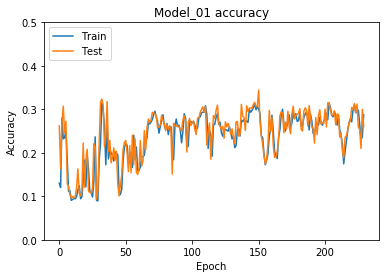

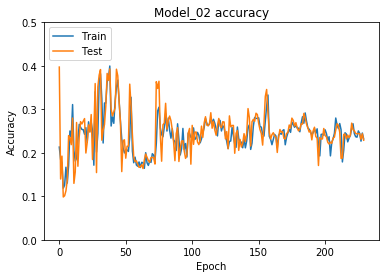

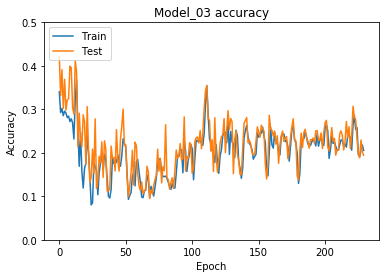

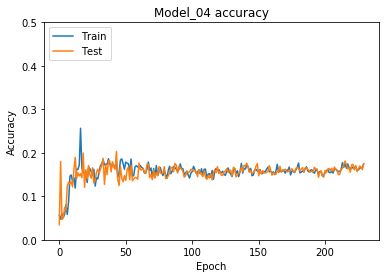

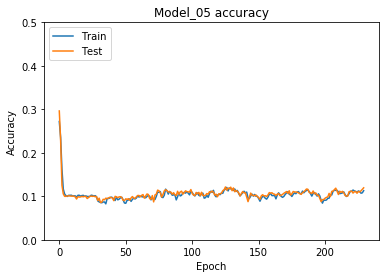

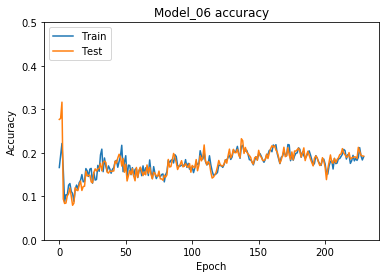

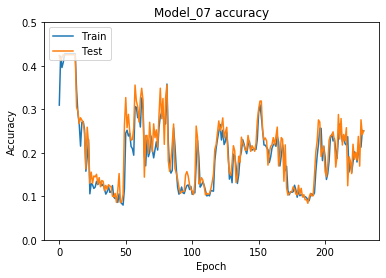

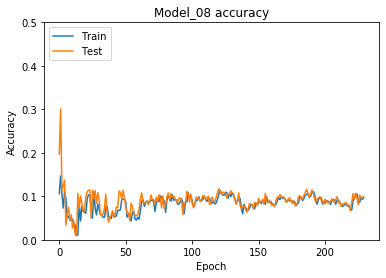

In [31]:
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_01,nparray_accuracy_Test_01,"01")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_02,nparray_accuracy_Test_02,"02")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_03,nparray_accuracy_Test_03,"03")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_04,nparray_accuracy_Test_04,"04")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_05,nparray_accuracy_Test_05,"05")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_06,nparray_accuracy_Test_06,"06")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_07,nparray_accuracy_Test_07,"07")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_08,nparray_accuracy_Test_08,"08")

In [32]:
# overlay loss train and test
def plot_loss_Train_vs_Test(nparray_loss_Train,nparray_loss_Test,modelName):
    plt.plot(nparray_loss_Train)
    plt.plot(nparray_loss_Test)
    plt.title('Model_'+modelName+' loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'],loc="upper left")
    plt.show()
# done function

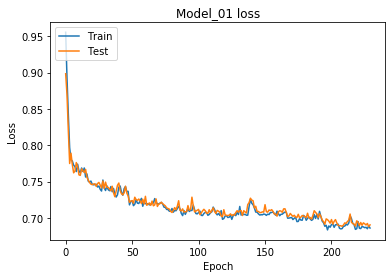

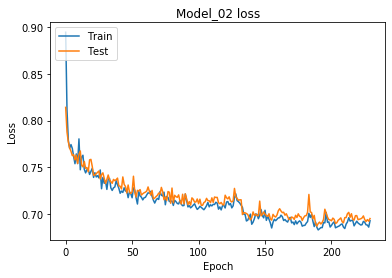

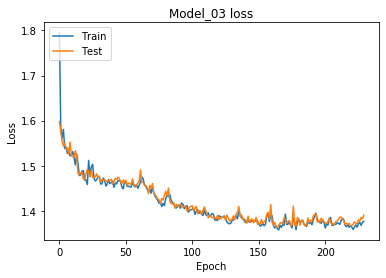

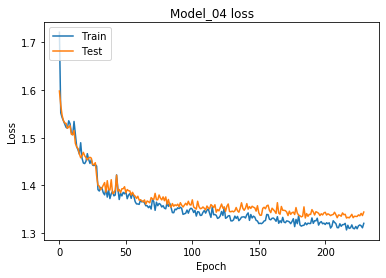

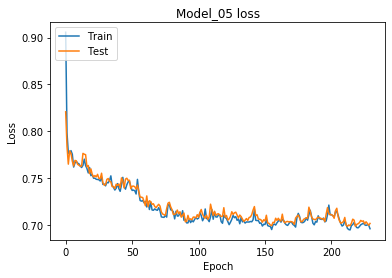

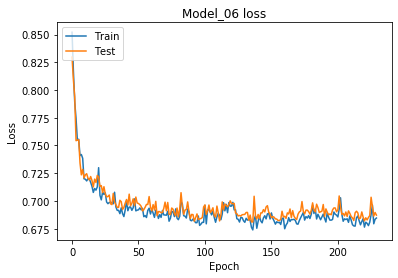

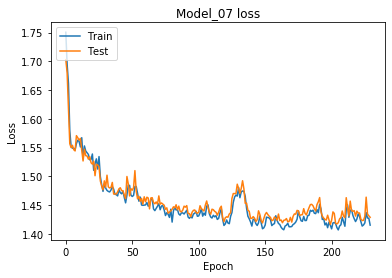

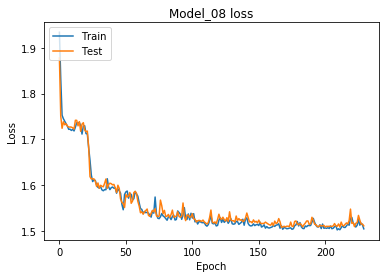

In [33]:
plot_loss_Train_vs_Test(nparray_loss_Train_01,nparray_loss_Test_01,"01")
plot_loss_Train_vs_Test(nparray_loss_Train_02,nparray_loss_Test_02,"02")
plot_loss_Train_vs_Test(nparray_loss_Train_03,nparray_loss_Test_03,"03")
plot_loss_Train_vs_Test(nparray_loss_Train_04,nparray_loss_Test_04,"04")
plot_loss_Train_vs_Test(nparray_loss_Train_05,nparray_loss_Test_05,"05")
plot_loss_Train_vs_Test(nparray_loss_Train_06,nparray_loss_Test_06,"06")
plot_loss_Train_vs_Test(nparray_loss_Train_07,nparray_loss_Test_07,"07")
plot_loss_Train_vs_Test(nparray_loss_Train_08,nparray_loss_Test_08,"08")

In [34]:
# overlay train and test we expect train to be better than test 
def plot_train_test(nparray_counterLineTrain,nparray_counterLineTest,modelName):
    plt.hist(nparray_counterLineTrain,bins=range(0,22),alpha=1,color="blue",histtype='step')
    plt.hist(nparray_counterLineTest,bins=range(0,22),alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Nr of hits corectly predicted')
    plt.title('Model_'+modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    plt.show()
# done function

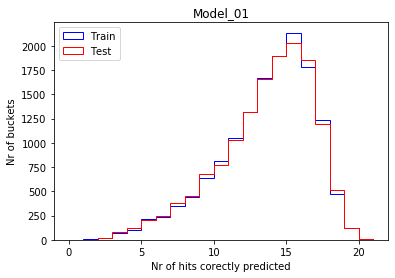

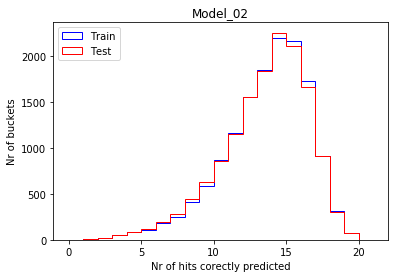

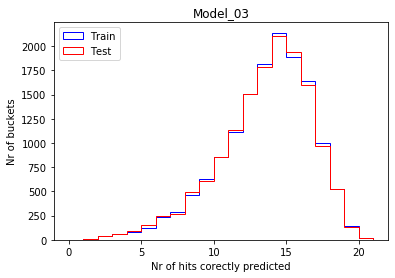

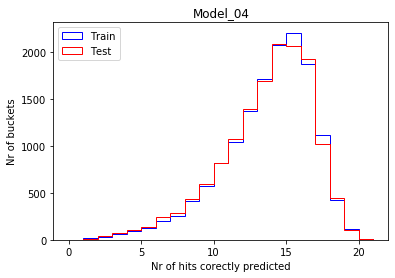

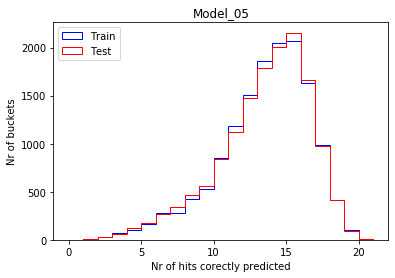

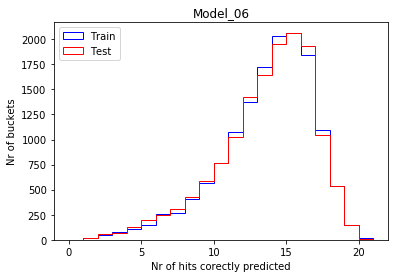

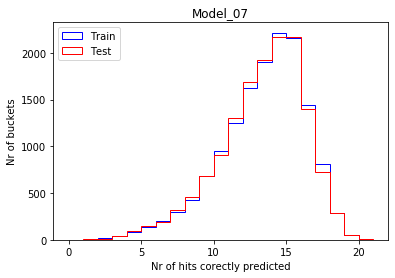

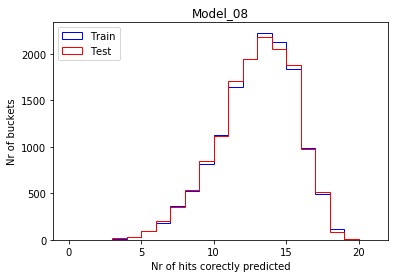

In [35]:
plot_train_test(nparray_counterLine_01_Train,nparray_counterLine_01_Test,"01")
plot_train_test(nparray_counterLine_02_Train,nparray_counterLine_02_Test,"02")
plot_train_test(nparray_counterLine_03_Train,nparray_counterLine_03_Test,"03")
plot_train_test(nparray_counterLine_04_Train,nparray_counterLine_04_Test,"04")
plot_train_test(nparray_counterLine_05_Train,nparray_counterLine_05_Test,"05")
plot_train_test(nparray_counterLine_06_Train,nparray_counterLine_06_Test,"06")
plot_train_test(nparray_counterLine_07_Train,nparray_counterLine_07_Test,"07")
plot_train_test(nparray_counterLine_08_Train,nparray_counterLine_08_Test,"08")


In [36]:
# Overlay several models for accuracy train
def plot_accuracy_train_several_models():
    plt.plot(nparray_accuracy_Train_01)
    plt.plot(nparray_accuracy_Train_02)
    plt.plot(nparray_accuracy_Train_03)
    plt.plot(nparray_accuracy_Train_04)
    plt.plot(nparray_accuracy_Train_05)
    plt.plot(nparray_accuracy_Train_06)
    plt.plot(nparray_accuracy_Train_07)
    plt.plot(nparray_accuracy_Train_08)
    plt.title('accuracy Train')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Model_01',"Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"], loc='best')
    plt.ylim(bottom=0)
    plt.show()
    
# done function

# Overlay several models for accuracy test
def plot_accuracy_test_several_models():
    plt.plot(nparray_accuracy_Test_01)
    plt.plot(nparray_accuracy_Test_02)
    plt.plot(nparray_accuracy_Test_03)
    plt.plot(nparray_accuracy_Test_04)
    plt.plot(nparray_accuracy_Test_05)
    plt.plot(nparray_accuracy_Test_06)
    plt.plot(nparray_accuracy_Test_07)
    plt.plot(nparray_accuracy_Test_08)
    plt.title('accuracy Test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Model_01',"Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"], loc='best')
    plt.ylim(bottom=0)
    plt.show()

# done function 

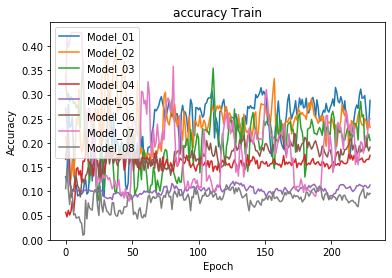

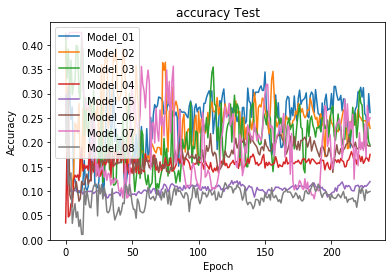

In [37]:
plot_accuracy_train_several_models()
plot_accuracy_test_several_models()

In [38]:
# Overlay several models for loss train
def plot_loss_train_several_models():
    plt.plot(nparray_loss_Train_01)
    plt.plot(nparray_loss_Train_02)
    plt.plot(nparray_loss_Train_03)
    plt.plot(nparray_loss_Train_04)
    plt.plot(nparray_loss_Train_05)
    plt.plot(nparray_loss_Train_06)
    plt.plot(nparray_loss_Train_07)
    plt.plot(nparray_loss_Train_08)
    plt.title('loss Train')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Model_01',"Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"], loc='best')
    plt.ylim(bottom=0)
    plt.show()
    
# done function

# Overlay several models for accuracy test
def plot_loss_test_several_models():
    plt.plot(nparray_loss_Test_01)
    plt.plot(nparray_loss_Test_02)
    plt.plot(nparray_loss_Test_03)
    plt.plot(nparray_loss_Test_04)
    plt.plot(nparray_loss_Test_05)
    plt.plot(nparray_loss_Test_06)
    plt.plot(nparray_loss_Test_07)
    plt.plot(nparray_loss_Test_08)
    plt.title('loss Test')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Model_01',"Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"], loc='best')
    plt.ylim(bottom=0)
    plt.show()

# done function 

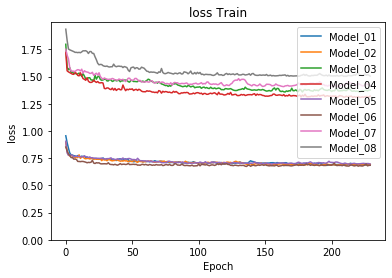

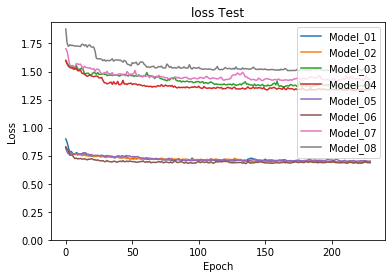

In [39]:
plot_loss_train_several_models()
plot_loss_test_several_models()

In [62]:
def plot_correctly_predicted_Train():
    plt.hist(nparray_counterLine_01_Train,bins=range(0,22),alpha=1,color="blue",histtype='step')
    plt.hist(nparray_counterLine_02_Train,bins=range(0,22),alpha=1,color="red",histtype='step')
    plt.hist(nparray_counterLine_03_Train,bins=range(0,22),alpha=1,color="green",histtype='step')
    plt.hist(nparray_counterLine_04_Train,bins=range(0,22),alpha=1,color="magenta",histtype='step')
    plt.hist(nparray_counterLine_05_Train,bins=range(0,22),alpha=1,color="black",histtype='step')
    plt.hist(nparray_counterLine_06_Train,bins=range(0,22),alpha=1,color="aqua",histtype='step')
    plt.hist(nparray_counterLine_07_Train,bins=range(0,22),alpha=1,color="purple",histtype='step')
    plt.hist(nparray_counterLine_08_Train,bins=range(0,22),alpha=1,color="peru",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Nr of hits corectly predicted')
    plt.title('Train')
    plt.legend(["Model_01","Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"],loc='upper left')
    #plt.ylim(bottom=0,top=100)
    plt.show()
# done function

# overlay several models for correctly predicted 
def plot_correctly_predicted_Test():
    plt.hist(nparray_counterLine_01_Test,bins=range(0,22),alpha=1,color="blue",histtype='step')
    plt.hist(nparray_counterLine_02_Test,bins=range(0,22),alpha=1,color="red",histtype='step')
    plt.hist(nparray_counterLine_03_Test,bins=range(0,22),alpha=1,color="green",histtype='step')
    plt.hist(nparray_counterLine_04_Test,bins=range(0,22),alpha=1,color="magenta",histtype='step')
    plt.hist(nparray_counterLine_05_Test,bins=range(0,22),alpha=1,color="black",histtype='step')
    plt.hist(nparray_counterLine_06_Test,bins=range(0,22),alpha=1,color="aqua",histtype='step')
    plt.hist(nparray_counterLine_07_Test,bins=range(0,22),alpha=1,color="purple",histtype='step')
    plt.hist(nparray_counterLine_08_Test,bins=range(0,22),alpha=1,color="peru",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Nr of hits corectly predicted')
    plt.title('Test')
    #plt.legend(["Model_01","Model_02","Model_03","Model_04"],loc='upper left')
    plt.legend(["Model_01","Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"],loc='upper left')
    #plt.ylim(bottom=0,top=100)
    plt.show()
# done function

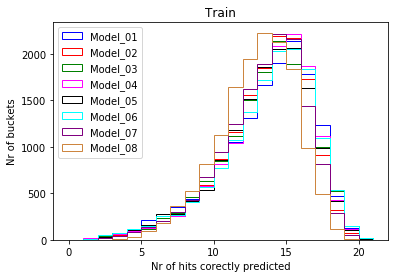

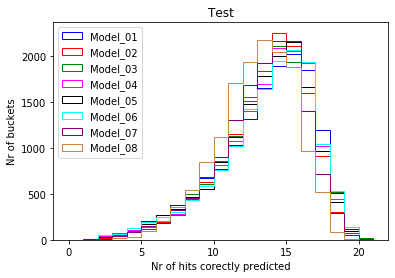

In [63]:
plot_correctly_predicted_Train()
plot_correctly_predicted_Test()

In [42]:
# overlay several models for correctly predicted 
def plot_overlay_hist(
        list_tupleArray,
        x_info=["My variable",(-1,-1)],
        y_info=["My count",(-1,-1)],
        title_info=["My title"],
        legend_info=["best"],
        debug=False
    ):
    nrEl=len(list_tupleArray)
    if debug:
        print("nrEl",nrEl)
    list_legend=[]
    for i in range(len(list_tupleArray)):
        tupleArray=list_tupleArray[i]
        if debug:
            print("i",i,"tupleArray",tupleArray,type(tupleArray),len(tupleArray))
        nparray=tupleArray[0]
        legend=tupleArray[1]
        color=tupleArray[2]
        if debug:
            print("nparray",nparray,"legend",legend,"color",color)
        plt.hist(nparray,bins=range(0,22),alpha=1,color=color,histtype='step')
        list_legend.append(legend)
    # done for loop for each numpy array to plot    
    # x-axis
    plt.xlabel(x_info[0])
    x_range=x_info[1]
    if x_range==(-1,-1):
        pass
    else:
        plt.xlim(left=x_range[0],right=x_range[1])
    # y-axis
    plt.ylabel(y_info[0])
    y_range=y_info[1]
    if y_range==(-1,-1):
        pass
    else:
        plt.ylim(bottom=y_range[0],top=y_range[1])
    # title
    plt.title(title_info[0])
    # legend
    if debug:
        print("list_legend",list_legend)
    legendLocation=legend_info[0]
    plt.legend(list_legend,loc=legendLocation)
    # show the actual plot
    plt.show()
    # all done, nothing to return
# done function

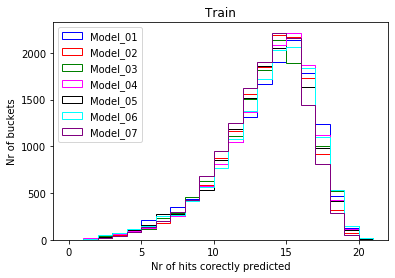

In [57]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_01_Train,"Model_01","blue"))
list_tupleArray.append((nparray_counterLine_02_Train,"Model_02","red"))
list_tupleArray.append((nparray_counterLine_03_Train,"Model_03","green"))
list_tupleArray.append((nparray_counterLine_04_Train,"Model_04","magenta"))
list_tupleArray.append((nparray_counterLine_05_Train,"Model_05","black"))
list_tupleArray.append((nparray_counterLine_06_Train,"Model_06","aqua"))
list_tupleArray.append((nparray_counterLine_07_Train,"Model_07","purple"))
list_tupleArray.append((nparray_counterLine_08_Train,"Model_08","peru"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Train"],
        legend_info=["upper left"],
        debug=False
    )

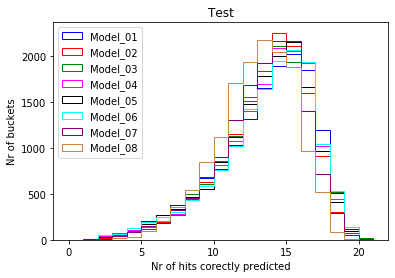

In [58]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_01_Test,"Model_01","blue"))
list_tupleArray.append((nparray_counterLine_02_Test,"Model_02","red"))
list_tupleArray.append((nparray_counterLine_03_Test,"Model_03","green"))
list_tupleArray.append((nparray_counterLine_04_Test,"Model_04","magenta"))
list_tupleArray.append((nparray_counterLine_05_Test,"Model_05","black"))
list_tupleArray.append((nparray_counterLine_06_Test,"Model_06","aqua"))
list_tupleArray.append((nparray_counterLine_07_Test,"Model_07","purple"))
list_tupleArray.append((nparray_counterLine_08_Test,"Model_08","peru"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Test"],
        legend_info=["upper left"],
        debug=False
    )

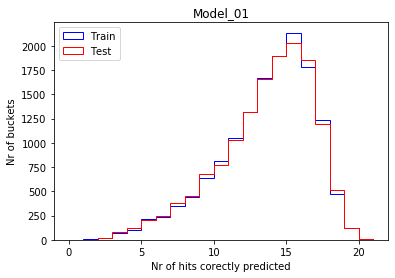

In [45]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_01_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_01_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_01"],
        legend_info=["upper left"],
        debug=False
    )

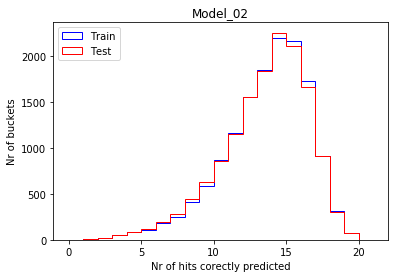

In [46]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_02_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_02_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_02"],
        legend_info=["upper left"],
        debug=False
    )

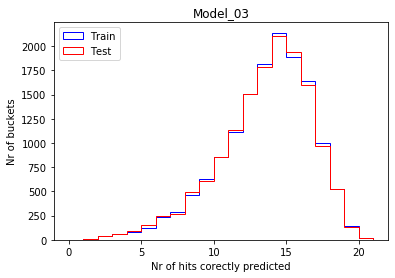

In [47]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_03_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_03_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_03"],
        legend_info=["upper left"],
        debug=False
    )

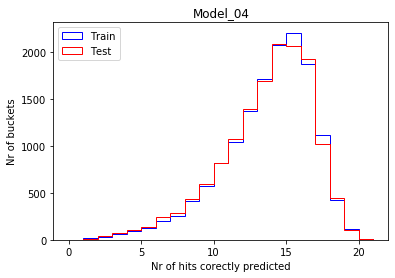

In [48]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_04_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_04_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_04"],
        legend_info=["upper left"],
        debug=False
    )

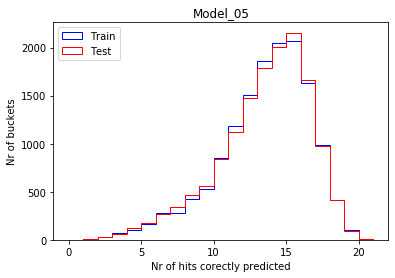

In [49]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_05_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_05_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_05"],
        legend_info=["upper left"],
        debug=False
    )

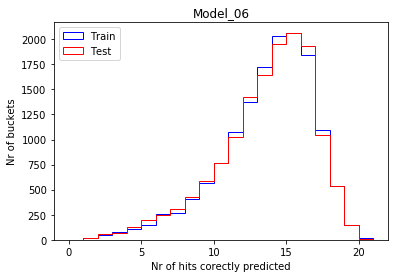

In [50]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_06_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_06_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_06"],
        legend_info=["upper left"],
        debug=False
    )

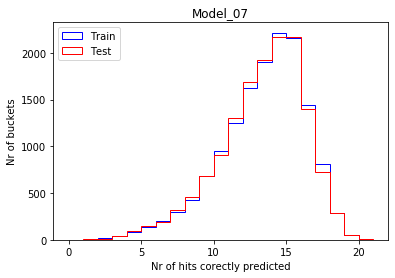

In [51]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_07_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_07_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_07"],
        legend_info=["upper left"],
        debug=False
    )

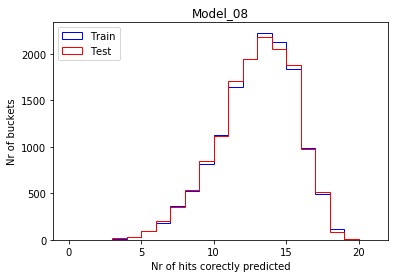

In [52]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_08_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_08_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_08"],
        legend_info=["upper left"],
        debug=False
    )

list_modelName ['Model_01', 'Model_02', 'Model_03', 'Model_04', 'Model_05', 'Model_06', 'Model_07', 'Model_08']
modelName Model_01


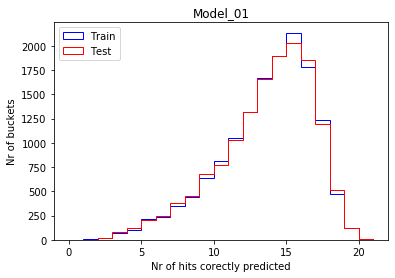

modelName Model_02


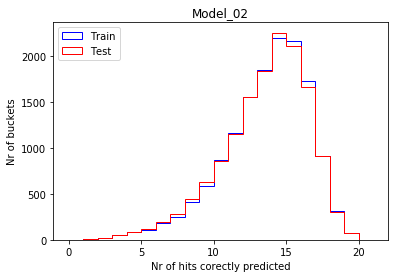

modelName Model_03


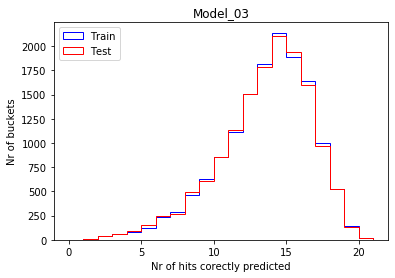

modelName Model_04


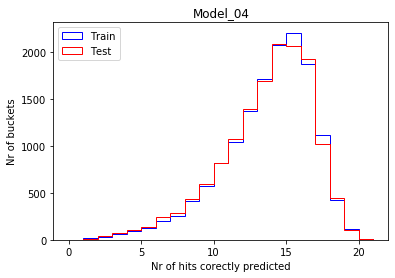

modelName Model_05


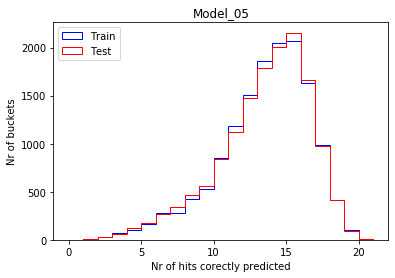

modelName Model_06


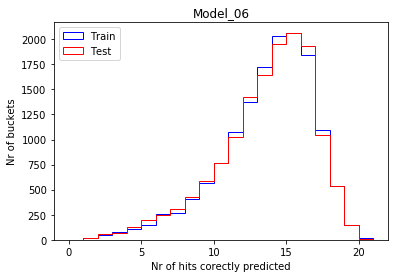

modelName Model_07


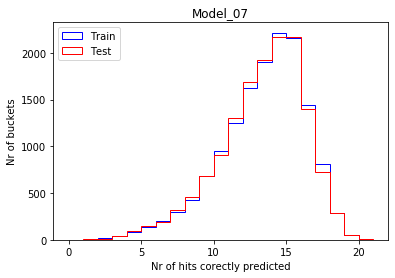

modelName Model_08


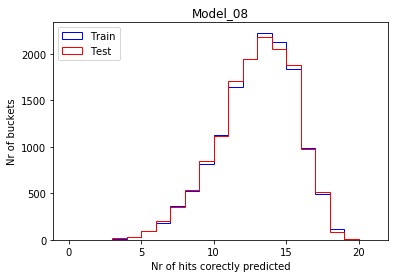

In [53]:
list_modelName=["Model_01","Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"]
print("list_modelName",list_modelName)
for modelName in list_modelName:
    print("modelName",modelName)
    list_tupleArray=[]
    if modelName=="Model_01":
        list_tupleArray.append((nparray_counterLine_01_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_01_Test,"Test","red"))
    elif modelName=="Model_02":
        list_tupleArray.append((nparray_counterLine_02_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_02_Test,"Test","red"))
    elif modelName=="Model_03":
        list_tupleArray.append((nparray_counterLine_03_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_03_Test,"Test","red"))
    elif modelName=="Model_04":
        list_tupleArray.append((nparray_counterLine_04_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_04_Test,"Test","red"))
    elif modelName=="Model_05":
        list_tupleArray.append((nparray_counterLine_05_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_05_Test,"Test","red"))
    elif modelName=="Model_06":
        list_tupleArray.append((nparray_counterLine_06_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_06_Test,"Test","red"))
    elif modelName=="Model_07":
        list_tupleArray.append((nparray_counterLine_07_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_07_Test,"Test","red"))
    elif modelName=="Model_08":
        list_tupleArray.append((nparray_counterLine_08_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_08_Test,"Test","red"))
    else:
        print("modelName",modelName,"not known. Choose Model_01 through Model_08. Will do nothing!")
    # done if
    plot_overlay_hist(
            list_tupleArray,
            x_info=["Nr of hits corectly predicted",(-1,-1)],
            y_info=["Nr of buckets",(-1,-1)],
            title_info=[modelName],
            legend_info=["upper left"],
            debug=False
        )
# done for loop over modelName

list_modelName ['Model_01', 'Model_02', 'Model_03', 'Model_04', 'Model_05', 'Model_06', 'Model_07', 'Model_08']
modelName Model_01


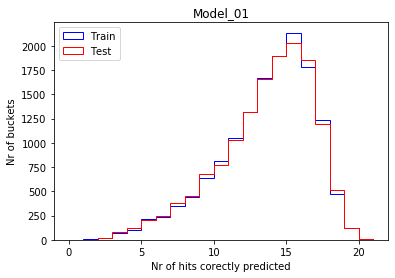

modelName Model_02


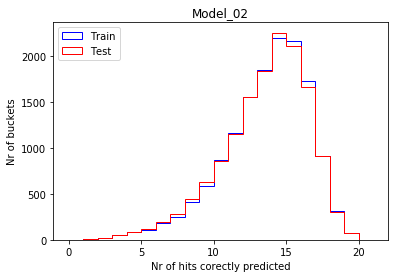

modelName Model_03


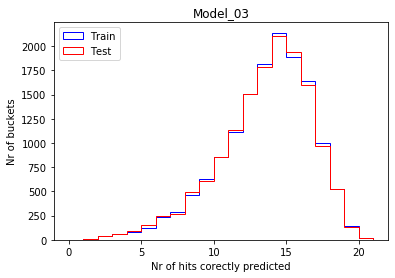

modelName Model_04


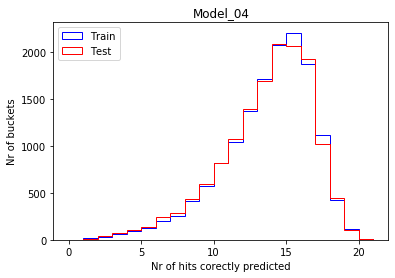

modelName Model_05


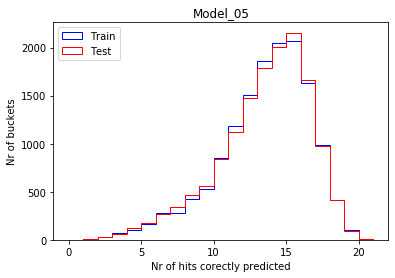

modelName Model_06


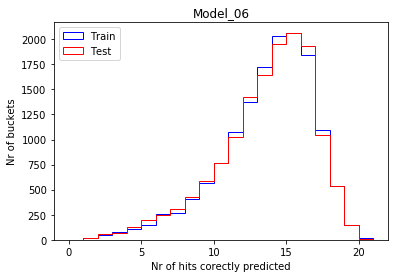

modelName Model_07


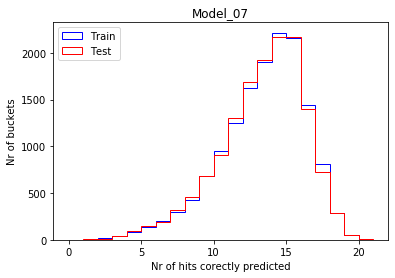

modelName Model_08


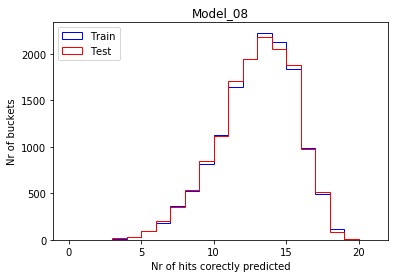

In [61]:
dict_name_nparray={}
dict_name_nparray["Model_01_Train"]=nparray_counterLine_01_Train
dict_name_nparray["Model_01_Test"]=nparray_counterLine_01_Test
dict_name_nparray["Model_02_Train"]=nparray_counterLine_02_Train
dict_name_nparray["Model_02_Test"]=nparray_counterLine_02_Test
dict_name_nparray["Model_03_Train"]=nparray_counterLine_03_Train
dict_name_nparray["Model_03_Test"]=nparray_counterLine_03_Test
dict_name_nparray["Model_04_Train"]=nparray_counterLine_04_Train
dict_name_nparray["Model_04_Test"]=nparray_counterLine_04_Test
dict_name_nparray["Model_05_Train"]=nparray_counterLine_05_Train
dict_name_nparray["Model_05_Test"]=nparray_counterLine_05_Test
dict_name_nparray["Model_06_Train"]=nparray_counterLine_06_Train
dict_name_nparray["Model_06_Test"]=nparray_counterLine_06_Test
dict_name_nparray["Model_07_Train"]=nparray_counterLine_07_Train
dict_name_nparray["Model_07_Test"]=nparray_counterLine_07_Test
dict_name_nparray["Model_08_Train"]=nparray_counterLine_08_Train
dict_name_nparray["Model_08_Test"]=nparray_counterLine_08_Test


list_modelName=["Model_01","Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"]
print("list_modelName",list_modelName)
for modelName in list_modelName:
    print("modelName",modelName)
    list_tupleArray=[]
    list_tupleArray.append((dict_name_nparray[modelName+"_"+"Train"],"Train","blue"))
    list_tupleArray.append((dict_name_nparray[modelName+"_"+"Test"],"Test","red"))
    plot_overlay_hist(
            list_tupleArray,
            x_info=["Nr of hits corectly predicted",(-1,-1)],
            y_info=["Nr of buckets",(-1,-1)],
            title_info=[modelName],
            legend_info=["upper left"],
            debug=False
        )
# done for loop over modelName

list_modelName ['Model_01', 'Model_02', 'Model_03', 'Model_04', 'Model_05', 'Model_06', 'Model_07', 'Model_08']
modelName Model_01


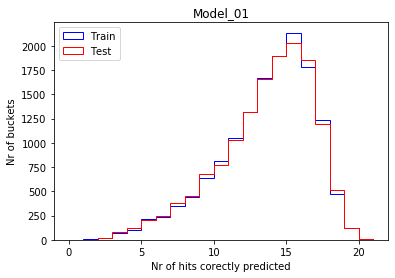

modelName Model_02


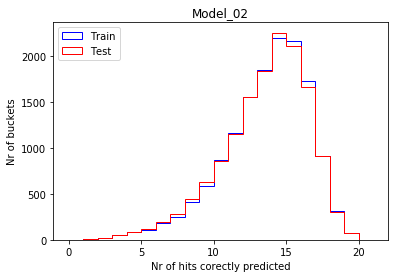

modelName Model_03


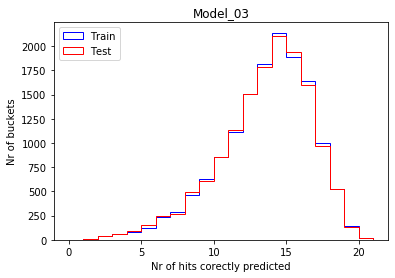

modelName Model_04


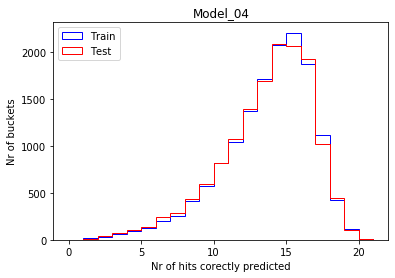

modelName Model_05


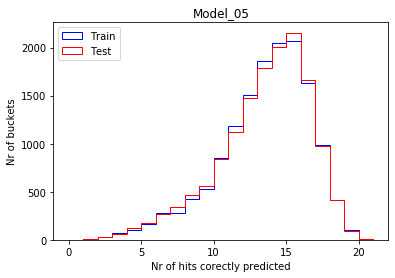

modelName Model_06


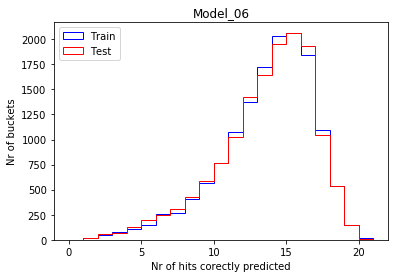

modelName Model_07


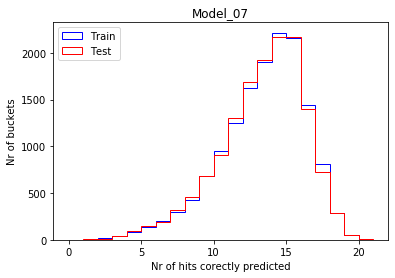

modelName Model_08


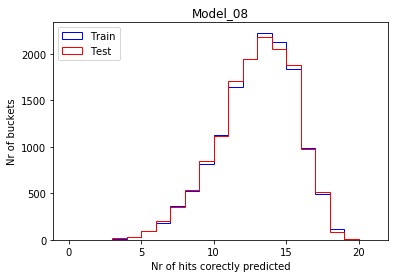

In [55]:
dict_name_nparray={}
dict_name_nparray["Model_01_Train"]=nparray_counterLine_01_Train
dict_name_nparray["Model_01_Test"]=nparray_counterLine_01_Test
dict_name_nparray["Model_02_Train"]=nparray_counterLine_02_Train
dict_name_nparray["Model_02_Test"]=nparray_counterLine_02_Test
dict_name_nparray["Model_03_Train"]=nparray_counterLine_03_Train
dict_name_nparray["Model_03_Test"]=nparray_counterLine_03_Test
dict_name_nparray["Model_04_Train"]=nparray_counterLine_04_Train
dict_name_nparray["Model_04_Test"]=nparray_counterLine_04_Test
dict_name_nparray["Model_05_Train"]=nparray_counterLine_05_Train
dict_name_nparray["Model_05_Test"]=nparray_counterLine_05_Test
dict_name_nparray["Model_06_Train"]=nparray_counterLine_06_Train
dict_name_nparray["Model_06_Test"]=nparray_counterLine_06_Test
dict_name_nparray["Model_07_Train"]=nparray_counterLine_07_Train
dict_name_nparray["Model_07_Test"]=nparray_counterLine_07_Test
dict_name_nparray["Model_08_Train"]=nparray_counterLine_08_Train
dict_name_nparray["Model_08_Test"]=nparray_counterLine_08_Test

list_TrainOrTest=["Train","Test"]
dict_TrainOrTest_color={
    "Train":"blue",
    "Test":"red",
}

list_modelName=["Model_01","Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"]
print("list_modelName",list_modelName)
for modelName in list_modelName:
    print("modelName",modelName)
    list_tupleArray=[]
    for TrainOrTest in list_TrainOrTest:
        list_tupleArray.append((dict_name_nparray[modelName+"_"+TrainOrTest],
                                TrainOrTest,
                                dict_TrainOrTest_color[TrainOrTest]))
    # done for loop over TrainOrTest
    plot_overlay_hist(
            list_tupleArray,
            x_info=["Nr of hits corectly predicted",(-1,-1)],
            y_info=["Nr of buckets",(-1,-1)],
            title_info=[modelName],
            legend_info=["upper left"],
            debug=False
        )
# done for loop over modelName